# Problem Statement

# Load Libraraies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
data_path='C:/Users/Laptop House/Data Science Intern/Intern Projects/EmployeeTrunoverPrediction/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
churn=pd.read_csv(data_path)

# Shape

In [4]:
churn.shape

(7043, 21)

# Dtypes

In [5]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

1. Change the Datatype of `TotalCharges`
2. But we can see that `TotalCharges` contain empty string so we will replace with nan

In [6]:
churn[churn['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


# Null values

In [7]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
churn.isnull().mean()*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

# Conculssion
1. we can see that there is 1% missing values so we can drop these values
2. Now change the Datatypes

In [9]:
churn.dropna(inplace=True)

In [10]:
churn=churn[~(churn['TotalCharges']==' ')]

In [11]:
churn['TotalCharges']=churn['TotalCharges'].astype('float64')

# Null values

In [12]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Duplicates

In [13]:
churn.duplicated().sum()

0

# Statistical Summary

In [14]:
churn.describe(include='number')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Conculssion
1. we can see that there is a `Red Flag` in `TotalChargers`

In [15]:
churn.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [16]:
for i in churn.select_dtypes('object').columns:
    print(f"Unique values in: {i}")
    print(churn[i].unique())
    
    print(f"Total Unique values{churn[i].nunique()}")
    print("*"*50)
    print()

Unique values in: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Total Unique values7032
**************************************************

Unique values in: gender
['Female' 'Male']
Total Unique values2
**************************************************

Unique values in: Partner
['Yes' 'No']
Total Unique values2
**************************************************

Unique values in: Dependents
['No' 'Yes']
Total Unique values2
**************************************************

Unique values in: PhoneService
['No' 'Yes']
Total Unique values2
**************************************************

Unique values in: MultipleLines
['No phone service' 'No' 'Yes']
Total Unique values3
**************************************************

Unique values in: InternetService
['DSL' 'Fiber optic' 'No']
Total Unique values3
**************************************************

Unique values in: OnlineSecurity
['No' 'Yes' 'No internet service']
Total Uniqu

# We can replace all the `no_services` with `no`

In [17]:
churn['MultipleLines'].replace("No phone service","No",inplace=True)

In [18]:
churn['OnlineSecurity'].replace('No internet service',"No",inplace=True)

In [19]:
churn['OnlineBackup'].replace('No internet service',"No",inplace=True)

In [20]:
churn['OnlineBackup'].replace('No internet service',"No",inplace=True)

In [21]:
churn['DeviceProtection'].replace('No internet service',"No",inplace=True)

In [22]:
churn['TechSupport'].replace('No internet service',"No",inplace=True)

In [23]:
churn['StreamingTV'].replace('No internet service',"No",inplace=True)

In [24]:
churn['StreamingMovies'].replace('No internet service',"No",inplace=True)

In [25]:
for i in churn.select_dtypes('object').columns:
    print(f"Unique values in: {i}")
    print(churn[i].unique())
    
    print(f"Total Unique values{churn[i].nunique()}")
    print("*"*50)
    print()

Unique values in: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Total Unique values7032
**************************************************

Unique values in: gender
['Female' 'Male']
Total Unique values2
**************************************************

Unique values in: Partner
['Yes' 'No']
Total Unique values2
**************************************************

Unique values in: Dependents
['No' 'Yes']
Total Unique values2
**************************************************

Unique values in: PhoneService
['No' 'Yes']
Total Unique values2
**************************************************

Unique values in: MultipleLines
['No' 'Yes']
Total Unique values2
**************************************************

Unique values in: InternetService
['DSL' 'Fiber optic' 'No']
Total Unique values3
**************************************************

Unique values in: OnlineSecurity
['No' 'Yes']
Total Unique values2
*******************************

# Info

In [26]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

# Exploratory Data Analysis

**We will drop the CostomerID Column b/c it can't give any necessary info**

In [27]:
churn.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [28]:
churn.drop(columns=['customerID'],inplace=True)

# Num-Analysis

### tenure

In [29]:
churn.select_dtypes('number').columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [30]:
churn['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [31]:
def show_distrubution(col):
    fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,7))
    ax1.set_title(f"Distrubution of {col}")
    sns.histplot(churn[col],ax=ax1)
    
    ax2.set_title(f"Distrubution of {col}")
    sns.kdeplot(churn[col],ax=ax2)
    
    ax3.set_title(f"BoxPlot of {col}")
    sns.boxplot(churn[col],ax=ax3)

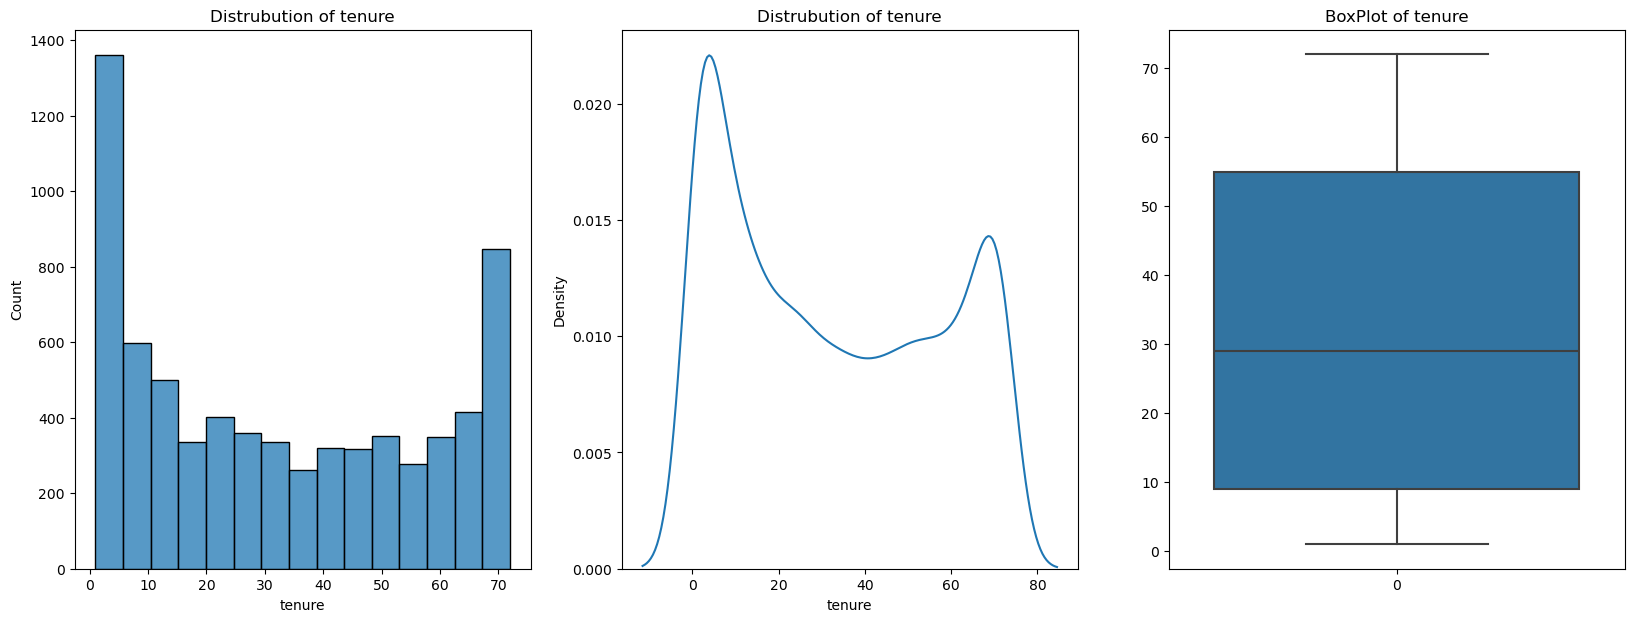

In [32]:
show_distrubution('tenure')

In [33]:
churn['tenure'].skew()

0.23773083190513133

# Conclussion
1. We can see that the data is almost normally distrubuted

# MonthlyCharges

In [34]:
churn['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

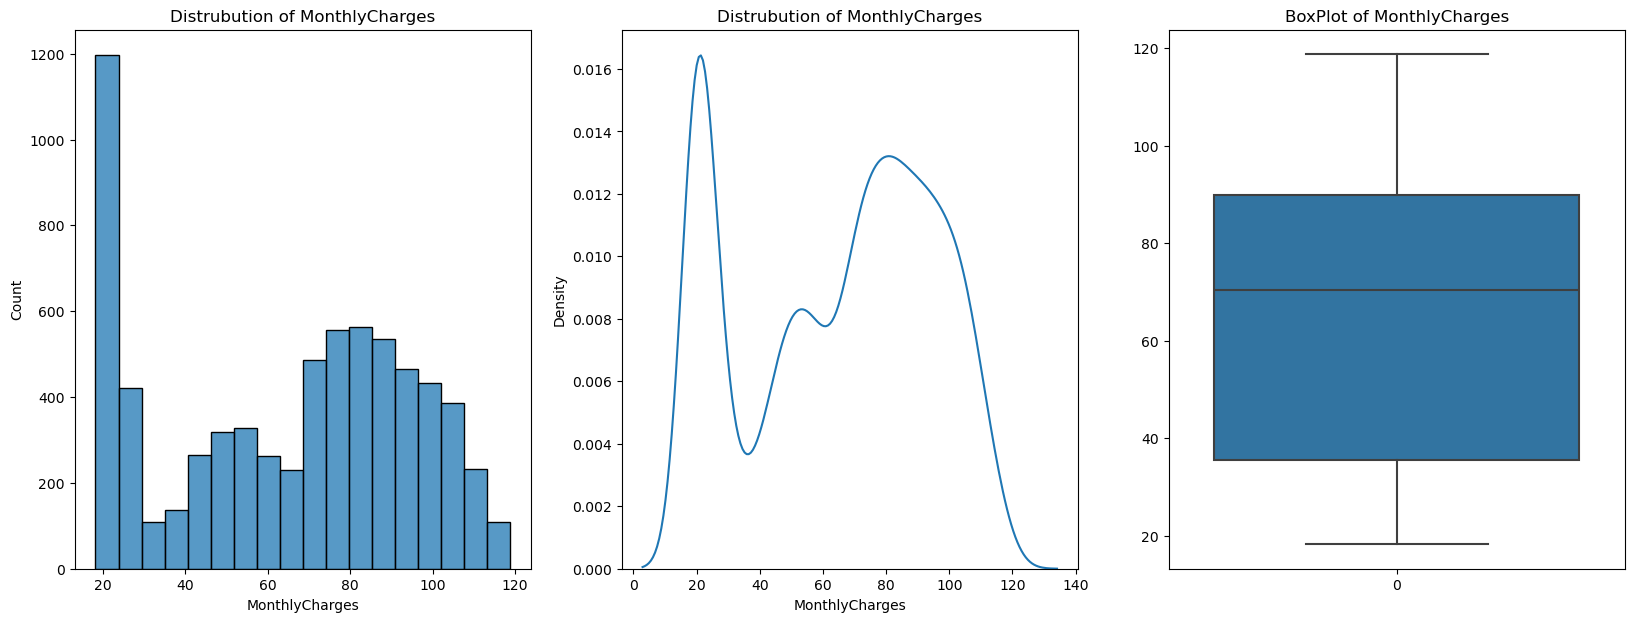

In [35]:
show_distrubution("MonthlyCharges")

In [36]:
churn['MonthlyCharges'].skew()

-0.22210292770166232

# Conclussion
1. We can see that data is right skewed

# TotalCharges

In [37]:
churn['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

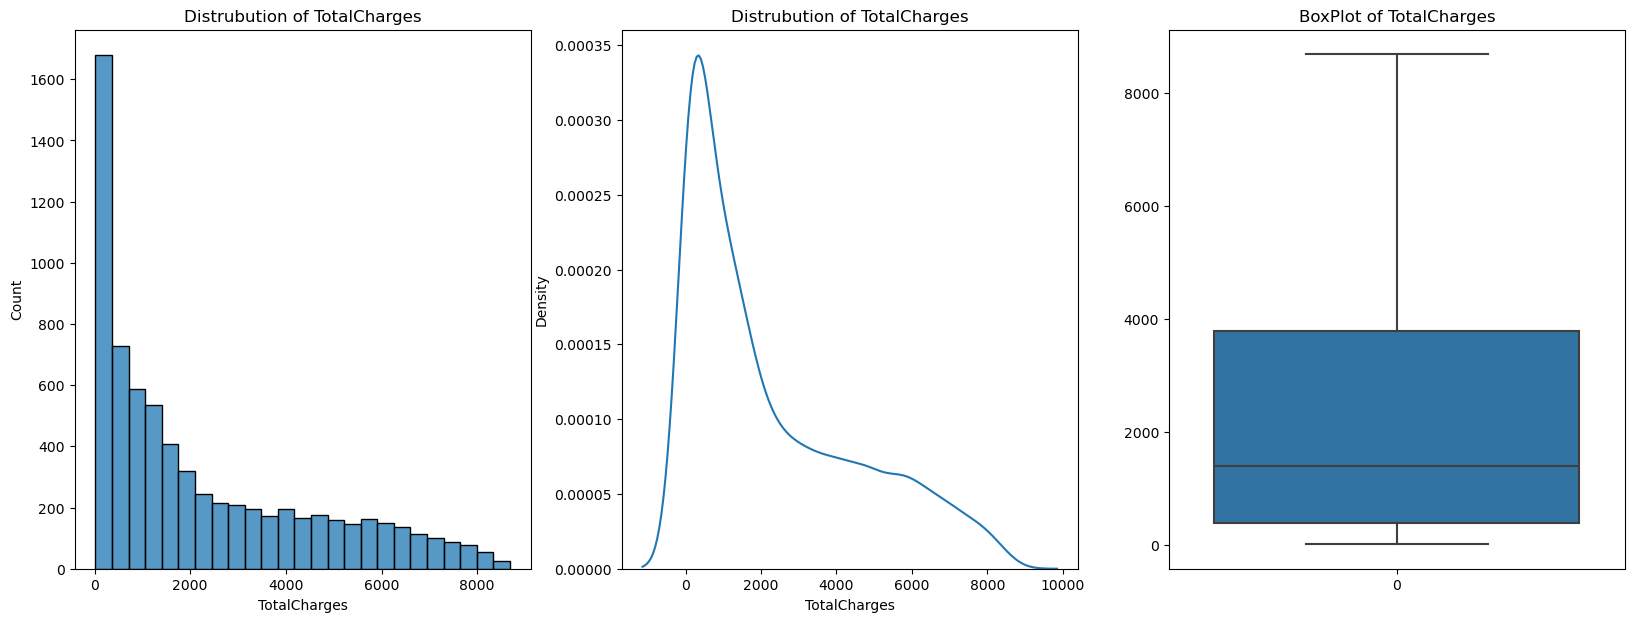

In [38]:
show_distrubution('TotalCharges')

In [39]:
churn['TotalCharges'].skew()

0.9616424997242504

# Conclussion
1. TotalCharges is also right skewed

# Catagorical Col

In [40]:
churn.select_dtypes('object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [41]:
churn.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


# Gender

In [42]:
churn['gender'].value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [43]:
churn['gender'].value_counts(normalize=True)*100

gender
Male      50.469283
Female    49.530717
Name: proportion, dtype: float64

In [44]:
def cat_show(col):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,7))
    ax1.set_title(f"BarChart of {col}")
    sns.barplot(x=churn[col].value_counts().index,
               y=churn[col].value_counts().values,ax=ax1,palette='viridis')
    
    ax2.set_title(f"Pie Chart of {col}")
    plt.pie(churn[col].value_counts(),labels=churn[col].value_counts().index,autopct='%.2f')

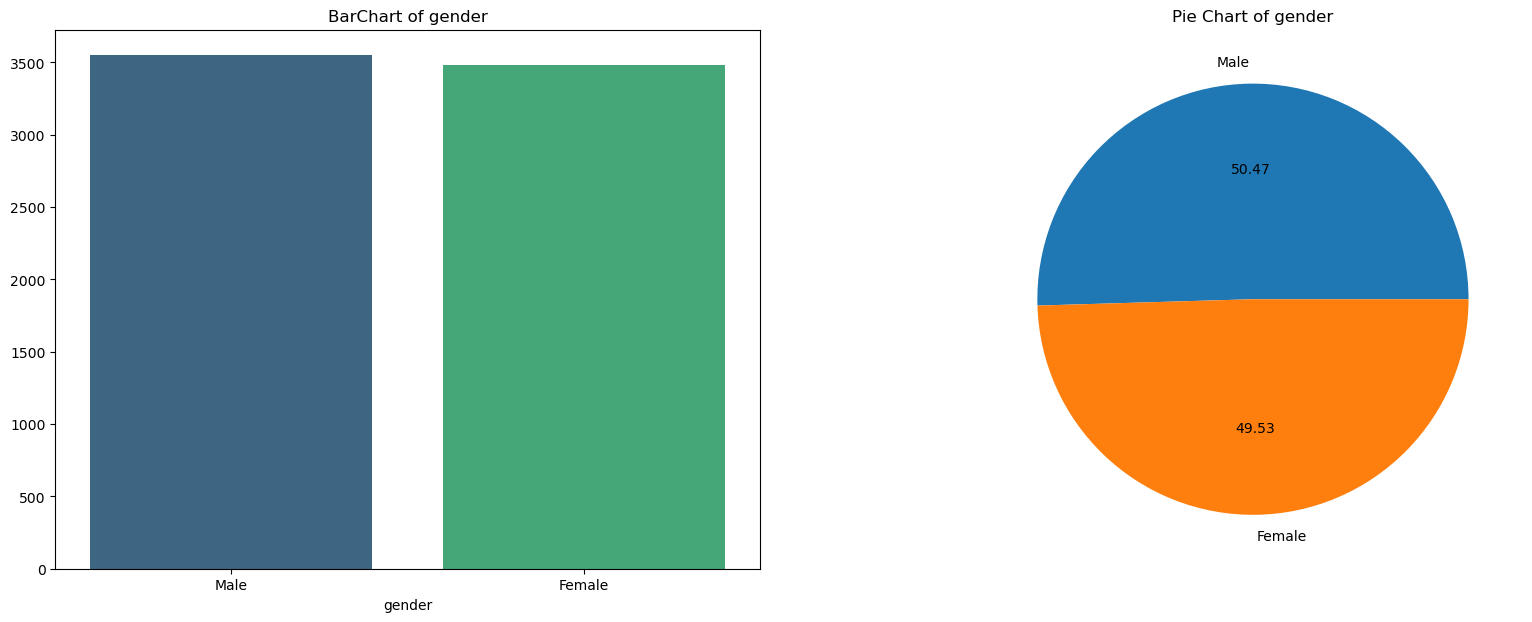

In [45]:
cat_show('gender')

# Conclussion
1. We can see that nbr of make is slightly greater then female

# Partner

In [46]:
churn['Partner'].value_counts()

Partner
No     3639
Yes    3393
Name: count, dtype: int64

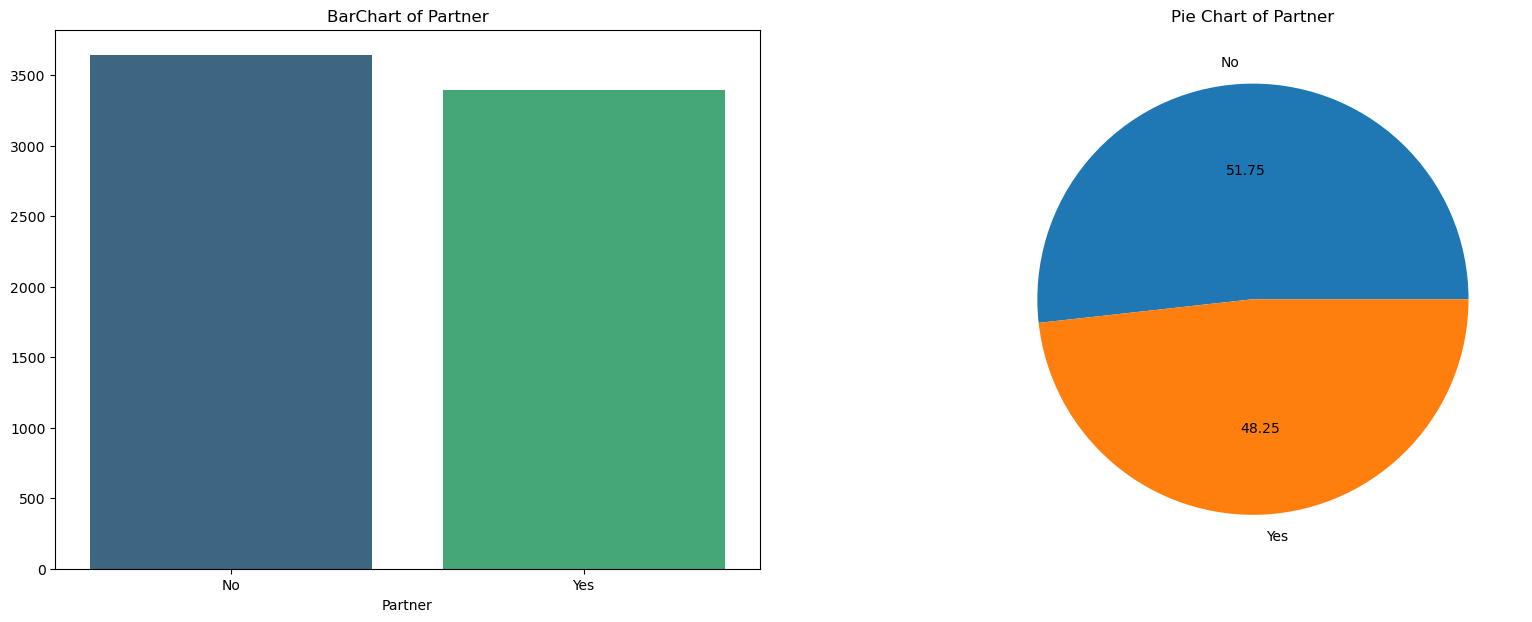

In [47]:
cat_show('Partner')

# Dependent

In [48]:
churn['Dependents'].value_counts()

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

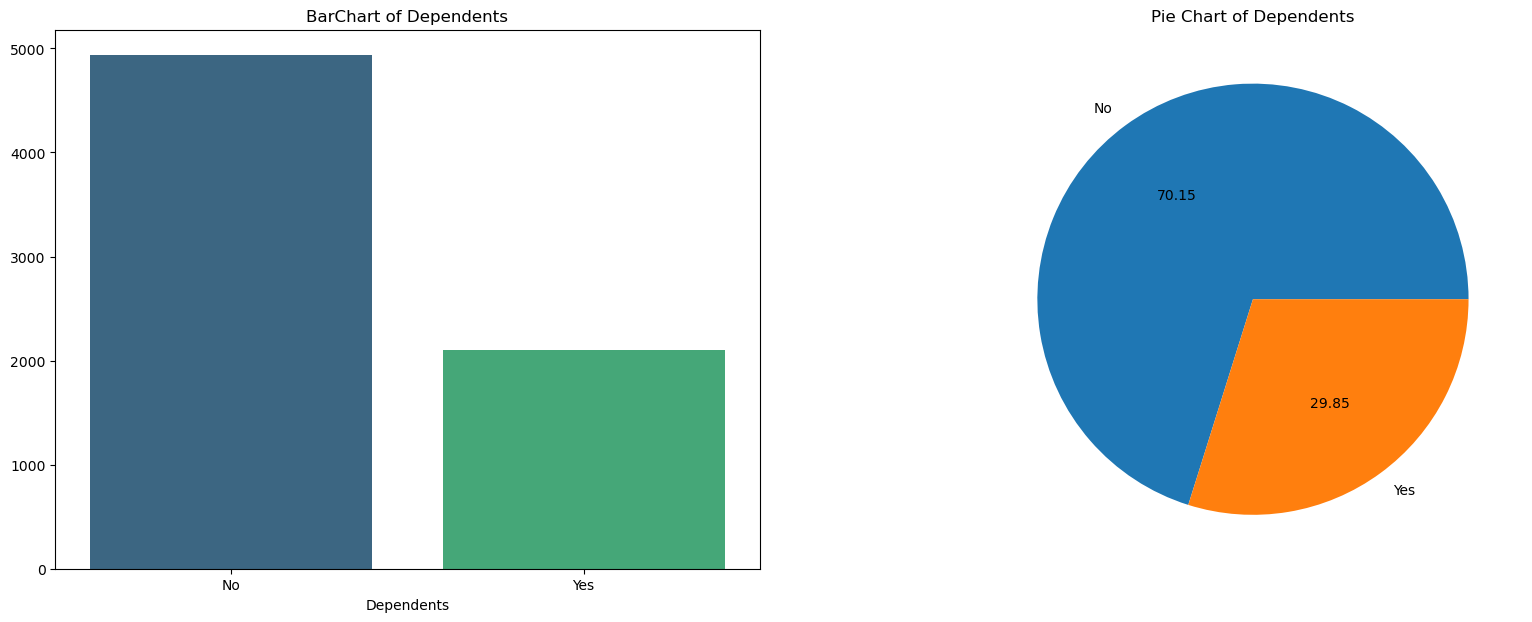

In [49]:
cat_show('Dependents')

# OnlineSecurity

In [50]:
churn['OnlineSecurity'].value_counts()

OnlineSecurity
No     5017
Yes    2015
Name: count, dtype: int64

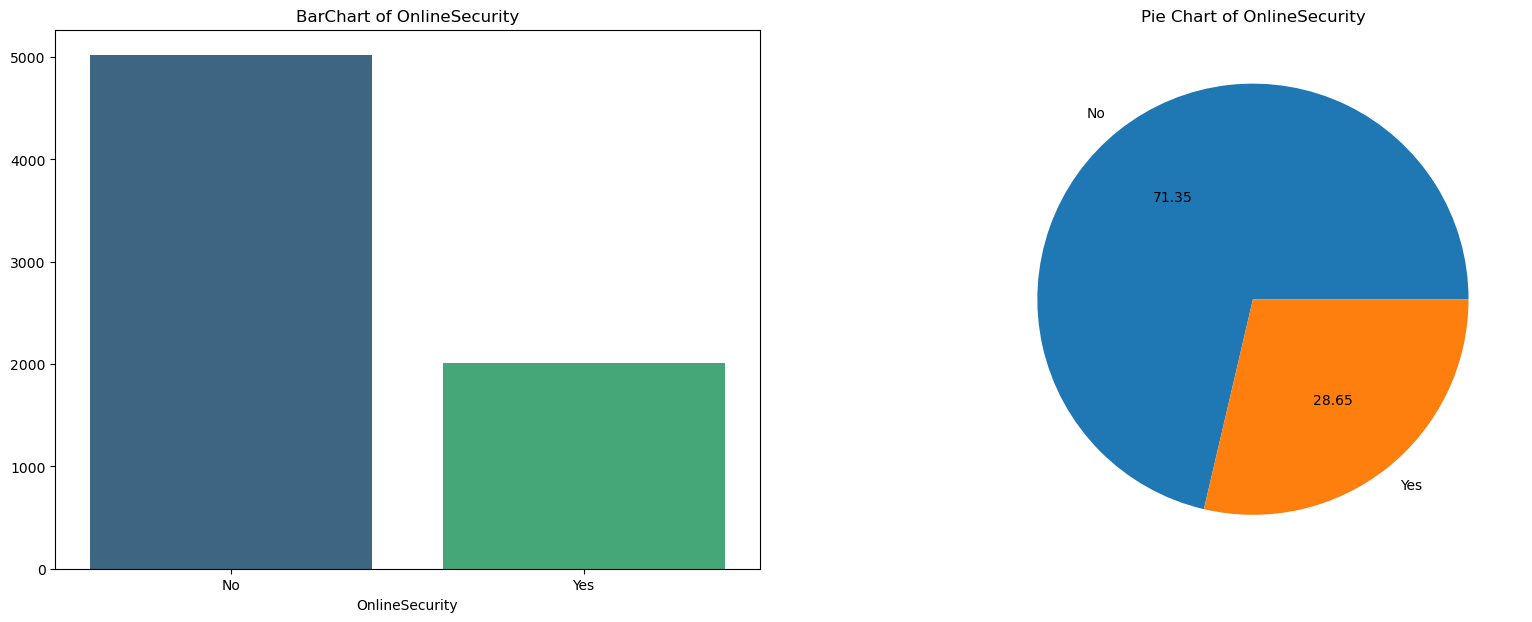

In [51]:
cat_show('OnlineSecurity')

# Conclussion
1. We can see that there is no online Scuierty available for customer most of time

# OnlineBackup

In [52]:
churn['OnlineBackup'].value_counts()

OnlineBackup
No     4607
Yes    2425
Name: count, dtype: int64

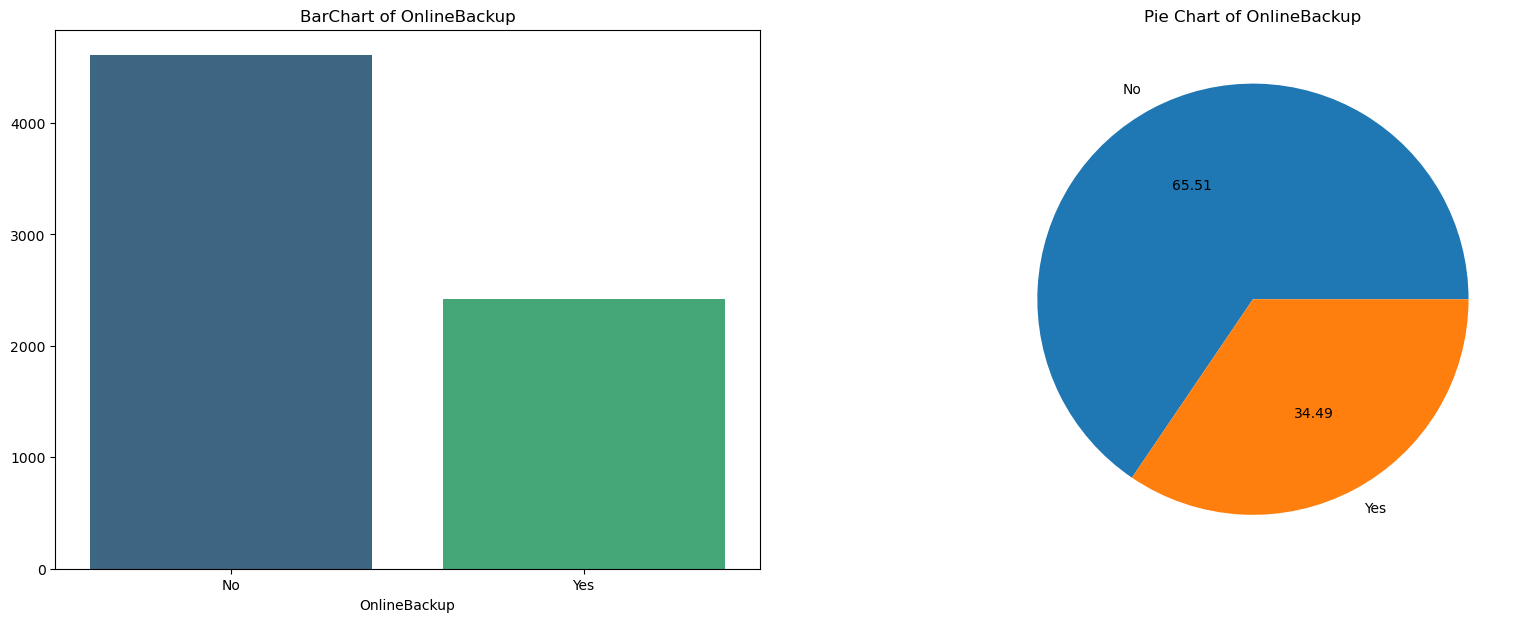

In [53]:
cat_show('OnlineBackup')

# Conclussion
1. There is also less nbr of backup available

In [54]:
churn['DeviceProtection'].value_counts()

DeviceProtection
No     4614
Yes    2418
Name: count, dtype: int64

In [55]:
churn['TechSupport'].value_counts()

TechSupport
No     4992
Yes    2040
Name: count, dtype: int64

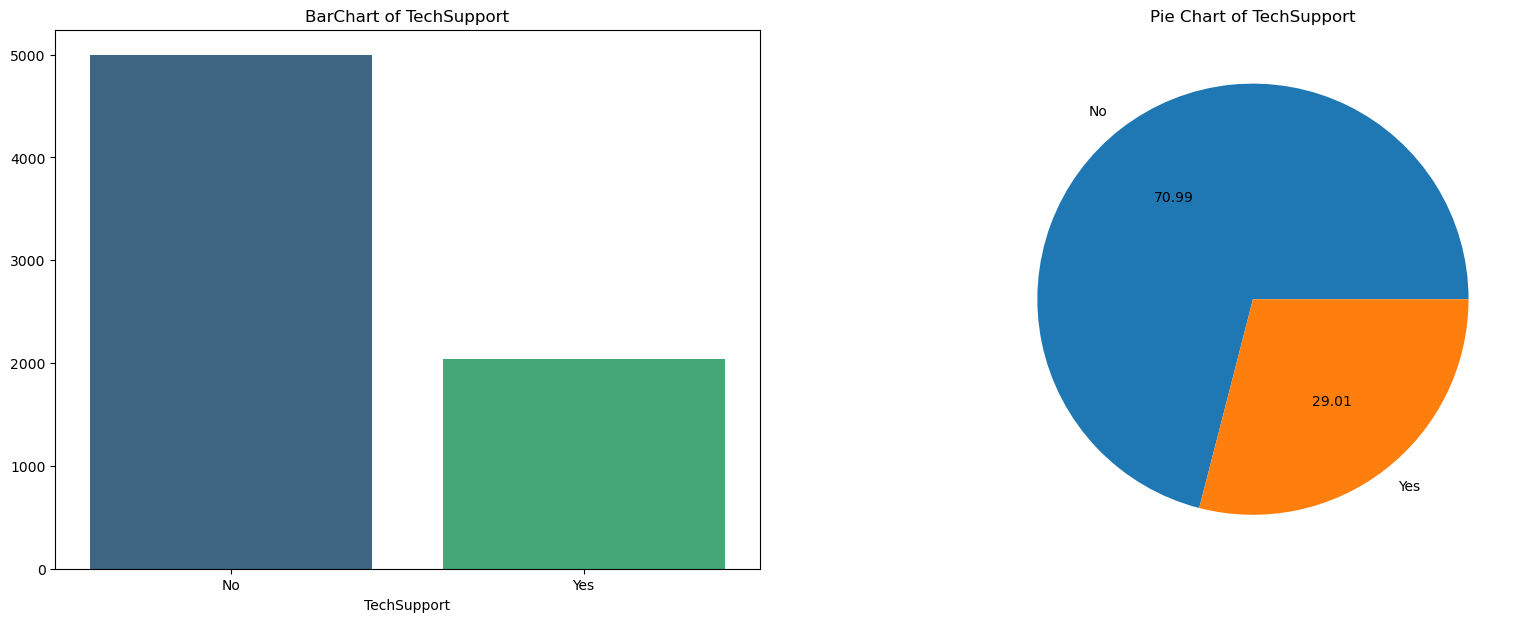

In [56]:
cat_show('TechSupport')

**In above these col we can see that there is less feature related to scuierty available for customer**

# PaymentMethod

In [57]:
churn['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

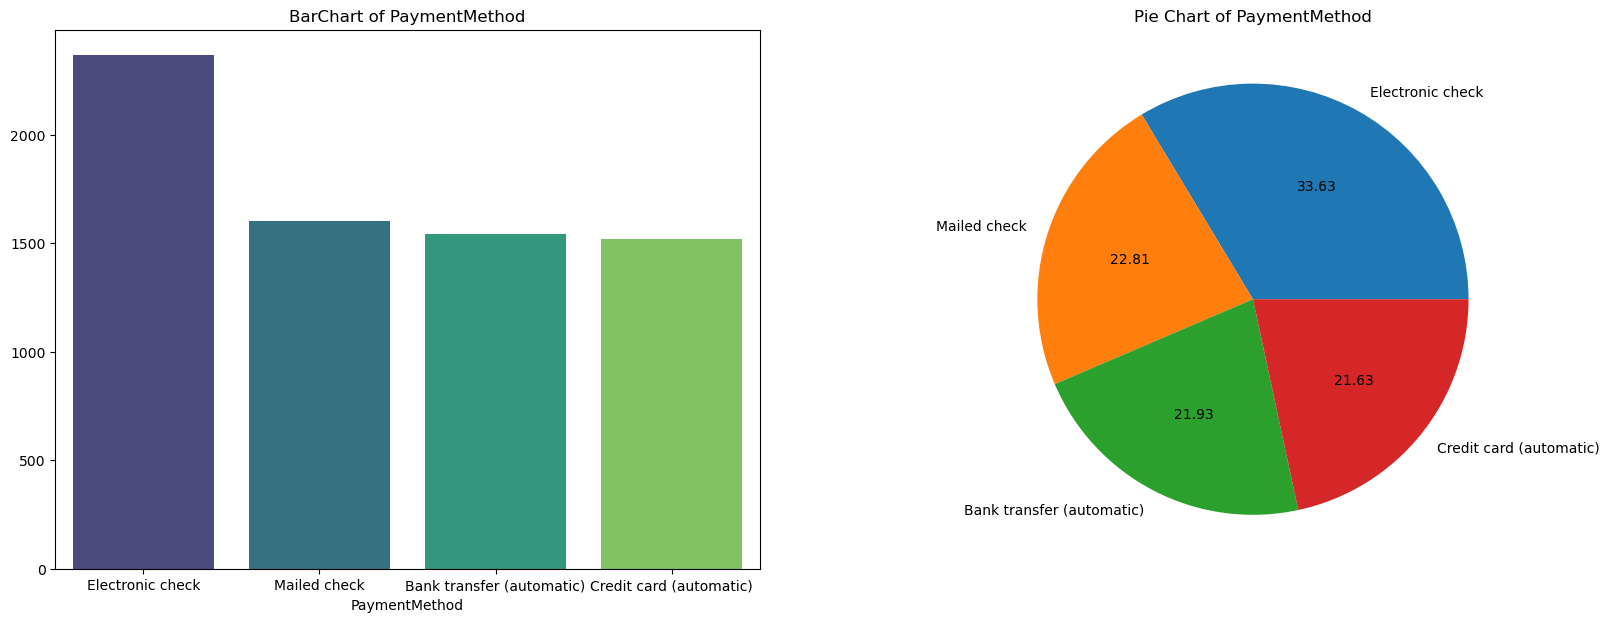

In [58]:
cat_show('PaymentMethod')

# Conclussion
1. We can see that most of the customer user `Electronic check` and less nbr of customer use others  like `CreditCard, Bank Transformer, Mail Check`

# Churn 

In [59]:
churn['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

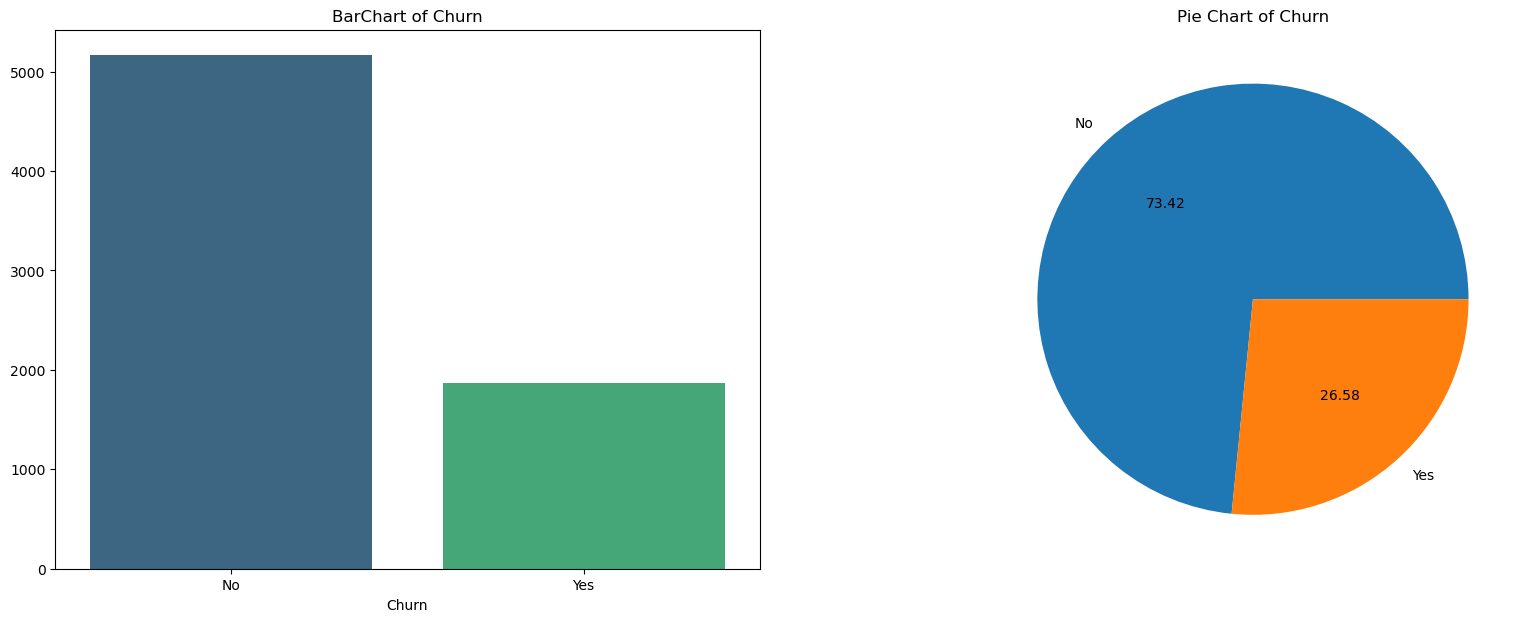

In [60]:
cat_show('Churn')

# Conclussion
1. We can see that thers is less nbr of Customer round About `26%` can leave and round about `73%` can't leave.

# Bivariate Analysis

## Num-Cat 

In [61]:
print(churn.select_dtypes('object').columns)
print(churn.select_dtypes('number').columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


# Churn vs tenure

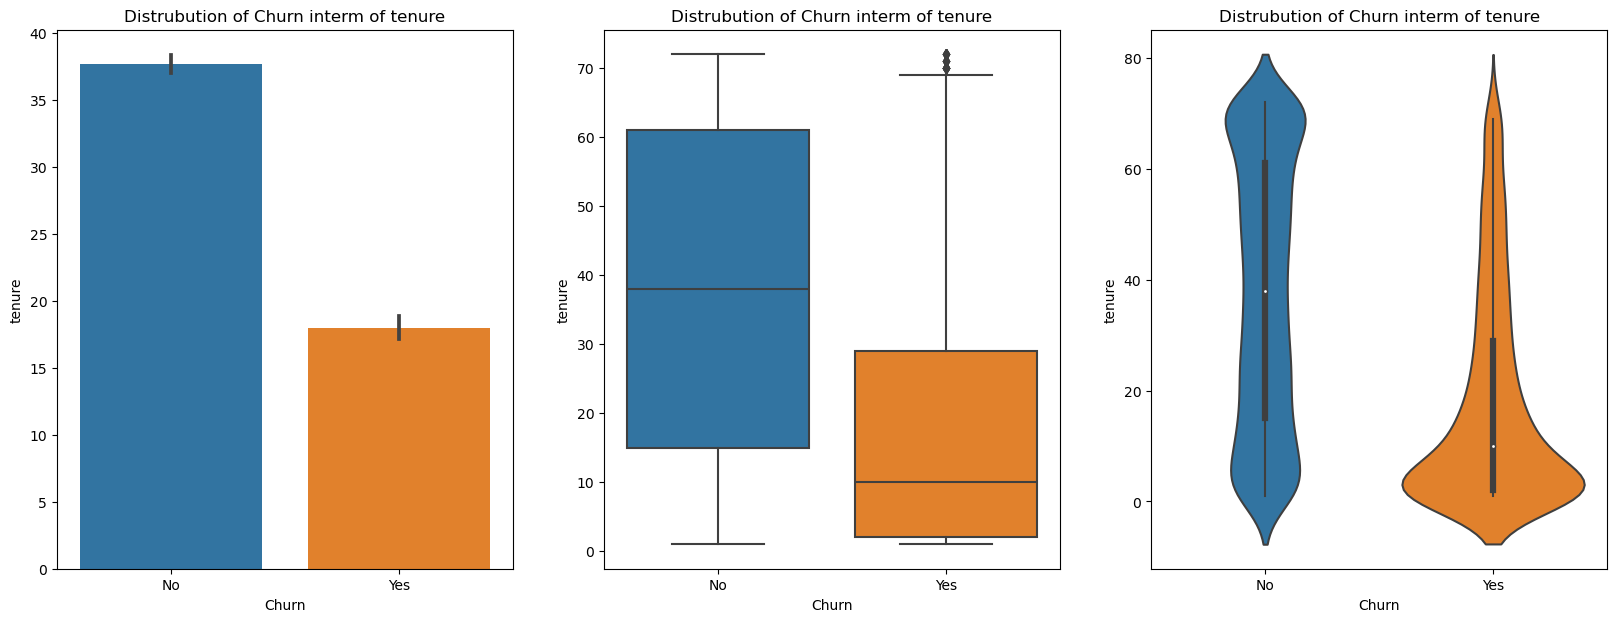

In [62]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,7))
ax1.set_title("Distrubution of Churn interm of tenure")
sns.barplot(x=churn['Churn'],y=churn['tenure'],ax=ax1)

ax2.set_title("Distrubution of Churn interm of tenure")
sns.boxplot(x=churn['Churn'],y=churn['tenure'],ax=ax2)

ax3.set_title("Distrubution of Churn interm of tenure")
sns.violinplot(x=churn['Churn'],y=churn['tenure'],ax=ax3)
plt.show()

# Conclussion
1. we can see that there is certian outlier on `yes` category 

In [63]:
print(churn.select_dtypes('object').columns)
print(churn.select_dtypes('number').columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


# MonthlyCharges vs Churn

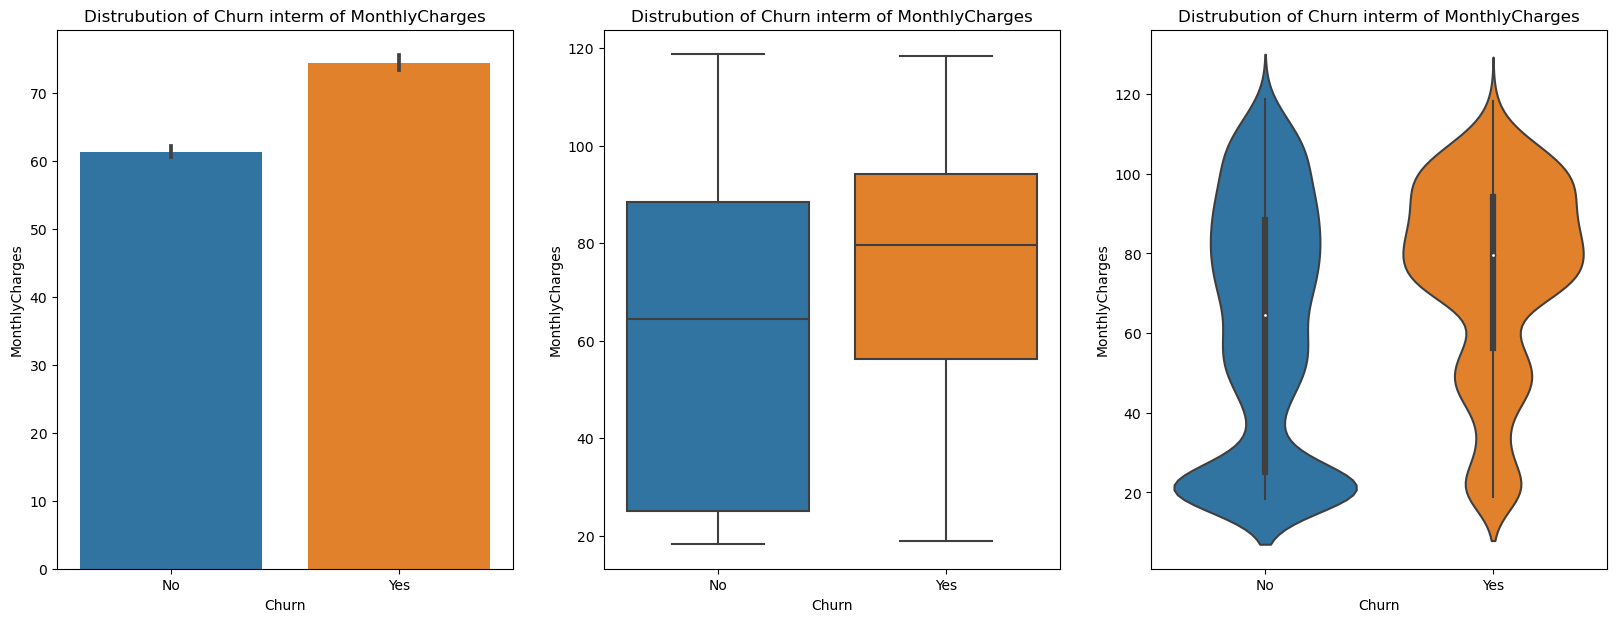

In [64]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,7))
ax1.set_title("Distrubution of Churn interm of MonthlyCharges")
sns.barplot(x=churn['Churn'],y=churn['MonthlyCharges'],ax=ax1)

ax2.set_title("Distrubution of Churn interm of MonthlyCharges")
sns.boxplot(x=churn['Churn'],y=churn['MonthlyCharges'],ax=ax2)

ax3.set_title("Distrubution of Churn interm of MonthlyCharges")
sns.violinplot(x=churn['Churn'],y=churn['MonthlyCharges'],ax=ax3)
plt.show()

In [65]:
print(churn.select_dtypes('object').columns)
print(churn.select_dtypes('number').columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


# Churn vs Total Chargers

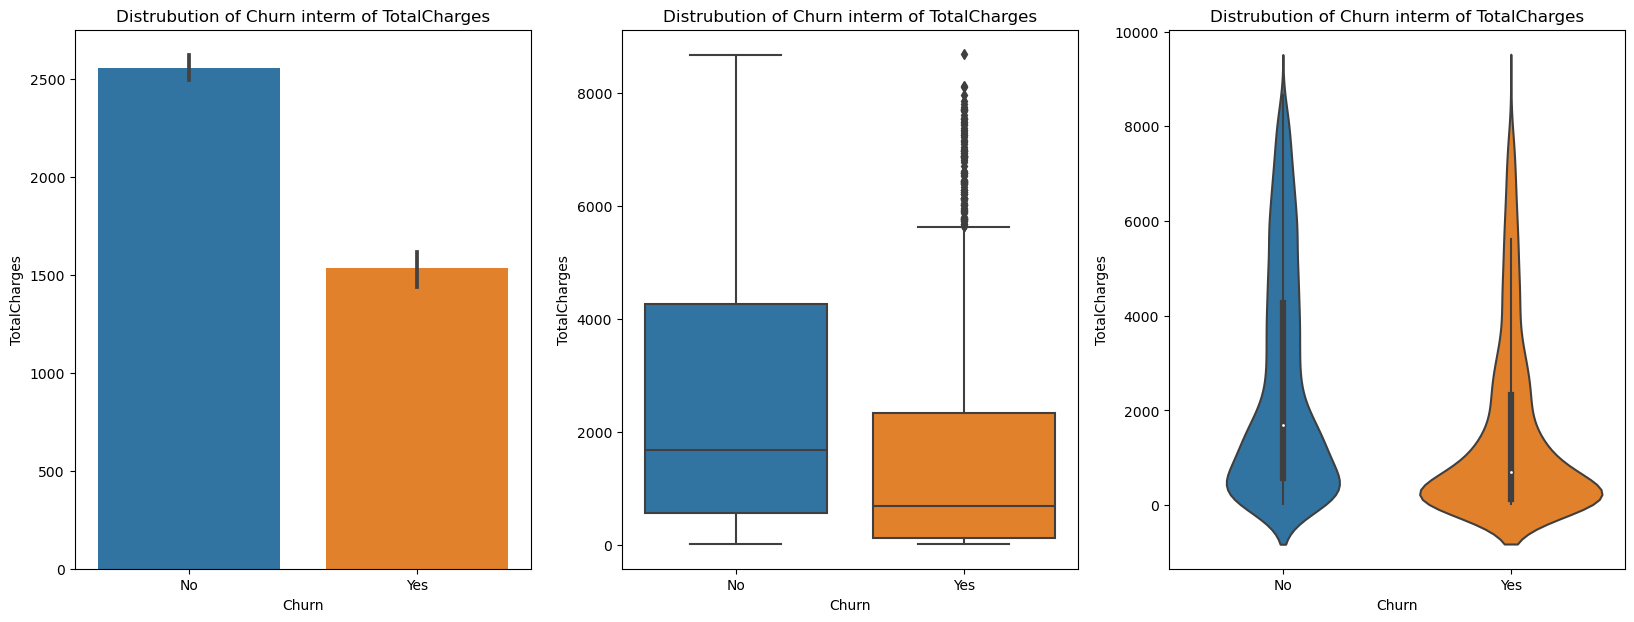

In [66]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,7))
ax1.set_title("Distrubution of Churn interm of TotalCharges")
sns.barplot(x=churn['Churn'],y=churn['TotalCharges'],ax=ax1)

ax2.set_title("Distrubution of Churn interm of TotalCharges")
sns.boxplot(x=churn['Churn'],y=churn['TotalCharges'],ax=ax2)

ax3.set_title("Distrubution of Churn interm of TotalCharges")
sns.violinplot(x=churn['Churn'],y=churn['TotalCharges'],ax=ax3)
plt.show()

# Conclussion
1. Total chargers contain certain outliers in term of `yes` category

In [67]:
churn.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


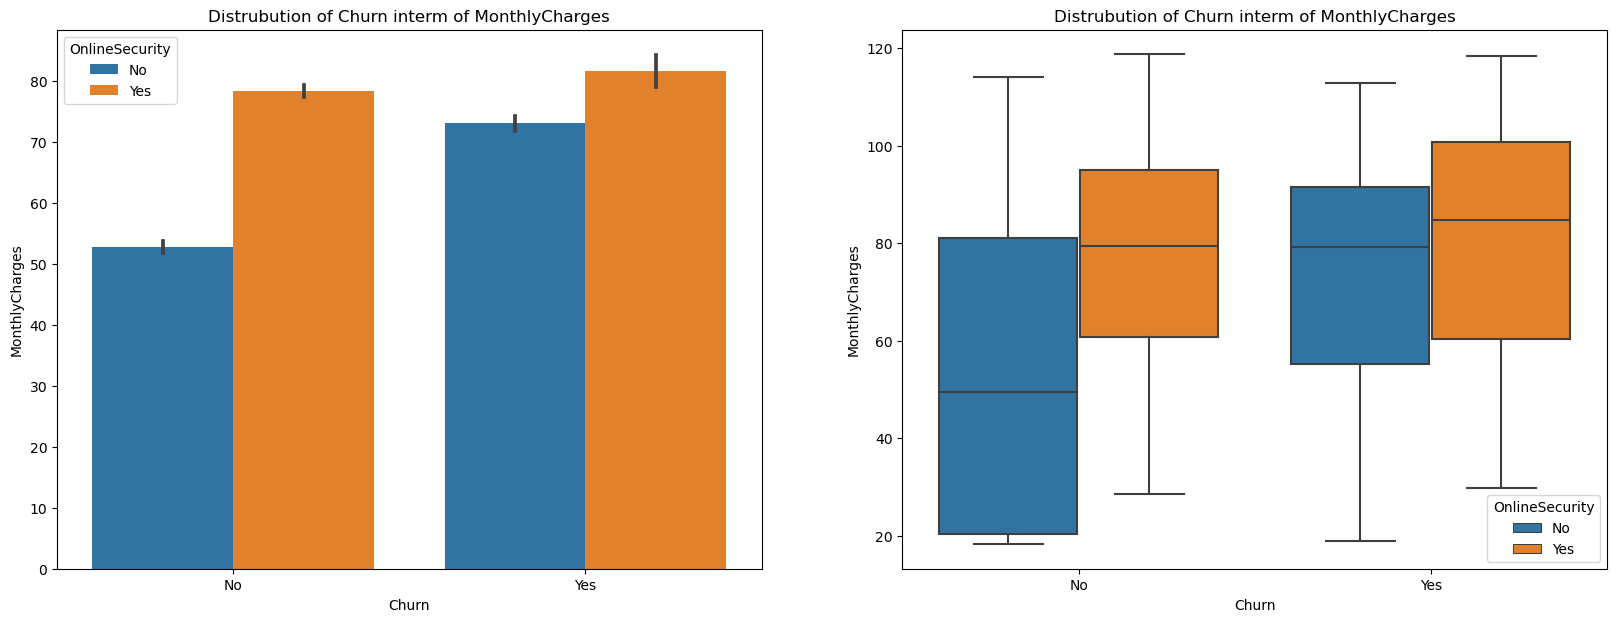

In [68]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,7))
ax1.set_title("Distrubution of Churn interm of MonthlyCharges")
sns.barplot(x=churn['Churn'],y=churn['MonthlyCharges'],ax=ax1,hue=churn['OnlineSecurity'])

ax2.set_title("Distrubution of Churn interm of MonthlyCharges")
sns.boxplot(x=churn['Churn'],y=churn['MonthlyCharges'],ax=ax2,hue=churn['OnlineSecurity'])

plt.show()

In [69]:
print(churn.select_dtypes('object').columns)
print(churn.select_dtypes('number').columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


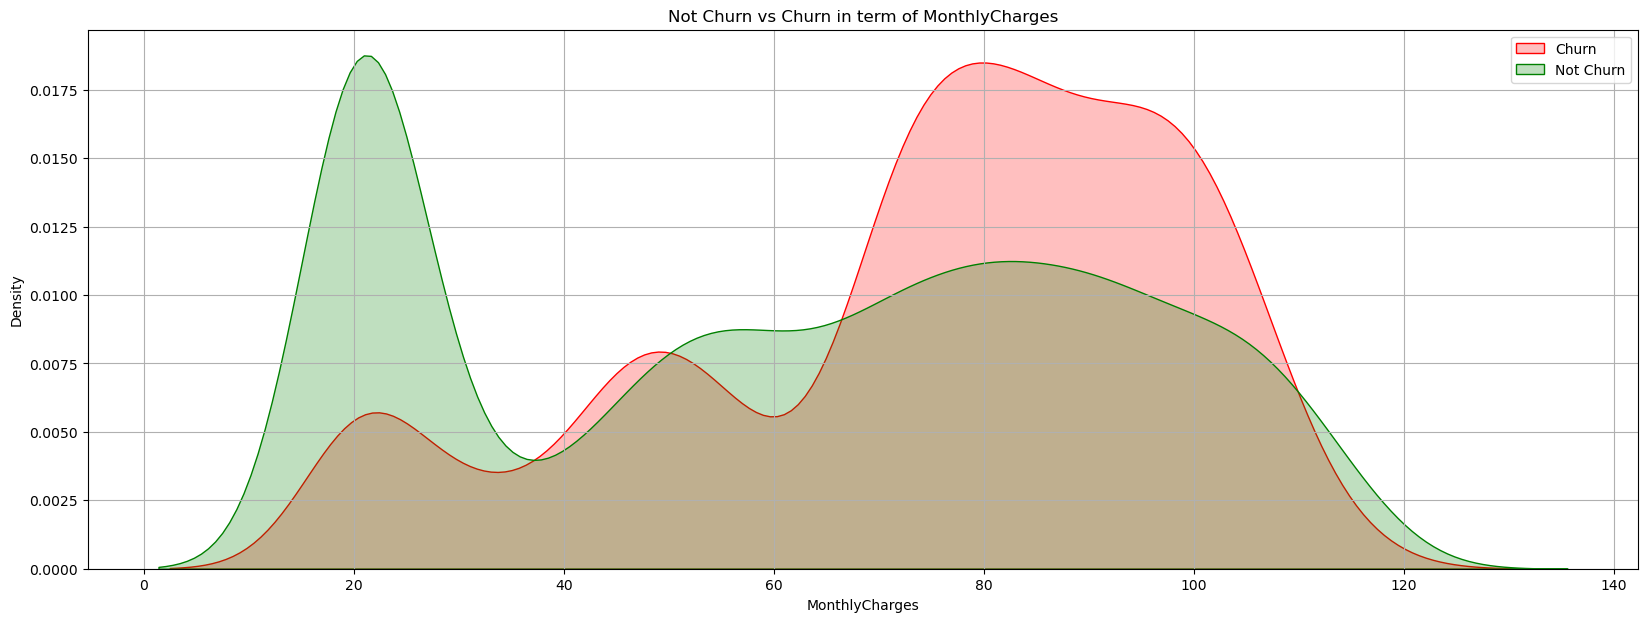

In [70]:
plt.figure(figsize=(20,7))
plt.title("Not Churn vs Churn in term of MonthlyCharges")
sns.kdeplot(churn[churn['Churn']=='Yes']['MonthlyCharges'],label='Churn',fill=True,color='red')
sns.kdeplot(churn[churn['Churn']=='No']['MonthlyCharges'],label='Not Churn',fill=True,color='green')
plt.legend()
plt.grid()
plt.show()

# Conclussion
1. we can see that those Contomer whose monthly  charges in range of 5-35 who can leave.
2. Those whose monthly charges in range 65-110 who can't leave.

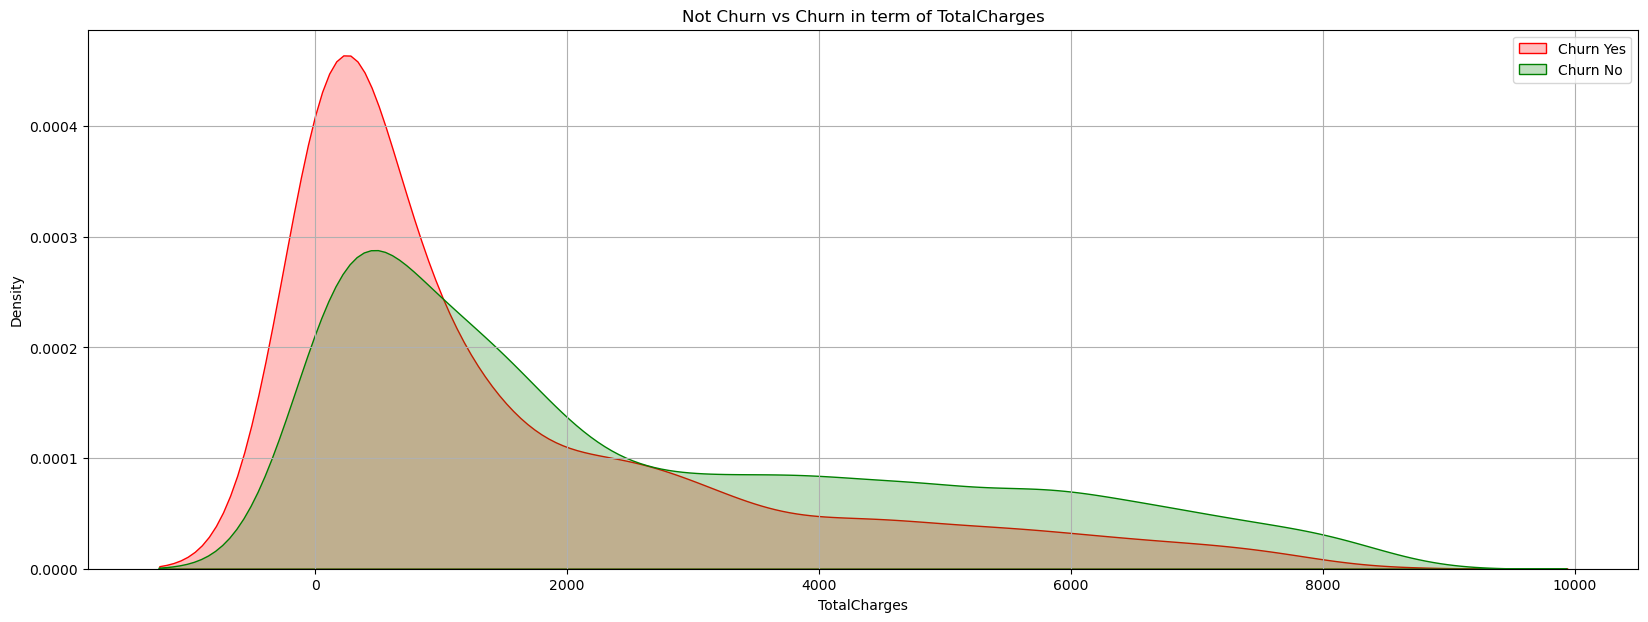

In [71]:
plt.figure(figsize=(20,7))
plt.title("Not Churn vs Churn in term of TotalCharges")
sns.kdeplot(churn[churn['Churn']=='Yes']['TotalCharges'],label='Churn Yes',fill=True,color='red')
sns.kdeplot(churn[churn['Churn']=='No']['TotalCharges'],label='Churn No',fill=True,color='green')
plt.legend()
plt.grid()
plt.show()

# Correlation matrix
1. we have a cat col first we can create a dummies
2. check the correlation 

In [72]:
dumies=pd.get_dummies(churn)

In [73]:
relation=dumies.corr()

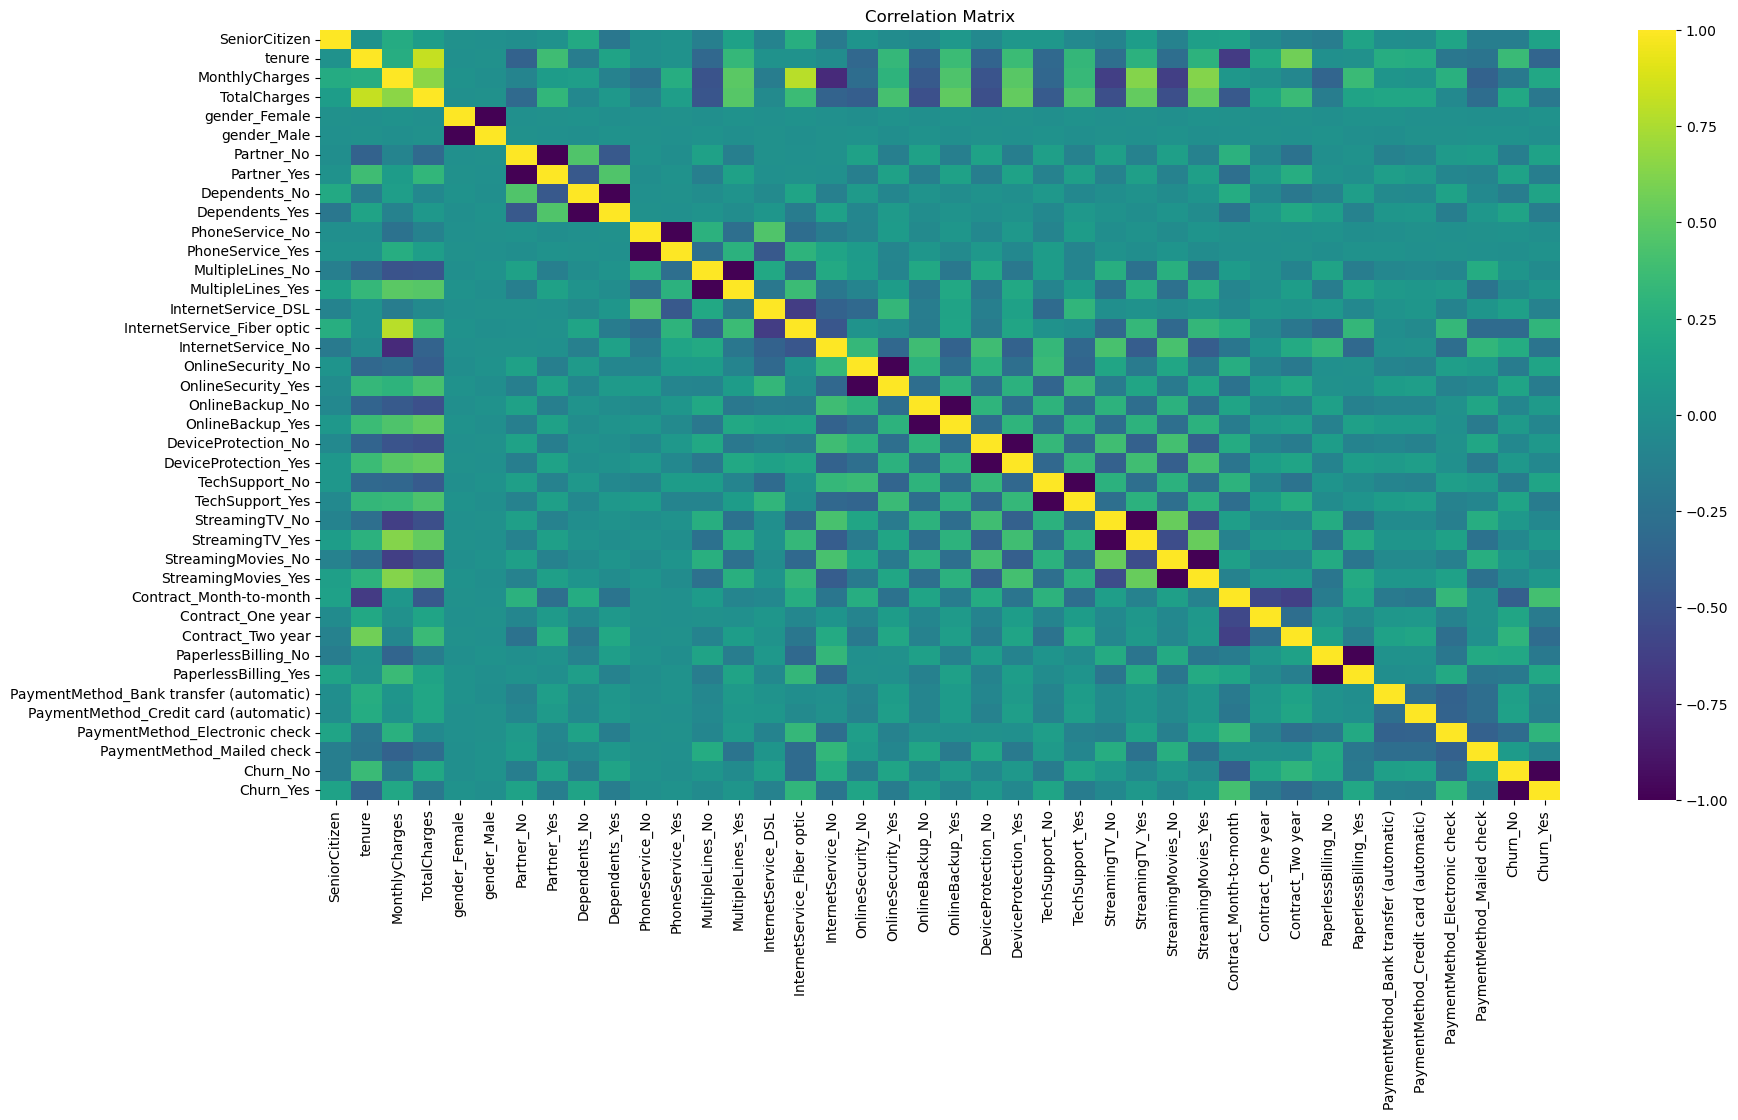

In [74]:
plt.figure(figsize=(20,10))
plt.title("Correlation Matrix")
sns.heatmap(relation,cmap="viridis")
plt.show()

# Building Model
1. Saperate the feature and label
2. Train Test Split

# Encode the target col

In [75]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

In [76]:
encode=LabelEncoder()
churn['Churn']=encode.fit_transform(churn['Churn'])

In [77]:
feature=churn.drop(columns=['Churn'])
label=churn['Churn']

In [78]:
feature.head(2)
feature.shape

(7032, 19)

In [79]:
label.head(2)

0    0
1    0
Name: Churn, dtype: int32

# tarin_test_split

In [80]:
from sklearn.model_selection import train_test_split,cross_val_score

In [81]:
x_train,x_test,y_train,y_test=train_test_split(feature,label,test_size=0.2,random_state=45)

In [82]:
feature.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


# Saperate the num and cat col

In [83]:
num_col=feature.select_dtypes('number').columns

In [84]:
cat_col=feature.select_dtypes('object').columns

# Building Pipeline for Num and Cat Col

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [86]:
num_pipe=Pipeline(steps=[
    ('scale',StandardScaler(with_mean=False))
])

In [87]:
cat_pipe=Pipeline(steps=[
    ('encode',OneHotEncoder(drop='first')),
    ('scale',StandardScaler(with_mean=False))
])

In [88]:
from sklearn.linear_model import LogisticRegression

# Building a Transformer

In [89]:
process=ColumnTransformer(transformers=[
    ('num_trans',num_pipe,num_col),
    ('cat_trans',cat_pipe,cat_col)
])

In [90]:
final=Pipeline(steps=[
    ('process',process),
    ('model',LogisticRegression(penalty='l2'))
])

In [91]:
final.fit(x_train,y_train)

Pipeline(steps=[('process',
                 ColumnTransformer(transformers=[('num_trans',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(drop='first')),
                                                                  ('scale',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', LogisticRegression())])

# prediction

In [92]:
pre=final.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,confusion_matrix,f1_score,recall_score,precision_score

In [94]:
def evulation_matrix(actual,pre):
    error=mean_squared_error(actual,pre)
    
    score=accuracy_score(actual,pre)
    
    matric=confusion_matrix(actual,pre)
    
    pression=precision_score(actual,pre)
    
    recall=recall_score(actual,pre)
    return {"Error":error,'Accuracy':score,'matrix':matric,"pression":pression,'recall':recall}

# Accuracy

In [95]:
matrix=evulation_matrix(y_test,pre)['matrix']
print(matrix)
print('-'*50)
print()

accuracy=evulation_matrix(y_test,pre)['Accuracy']
print('accuracy',accuracy)
print('-'*50)
print()

error=evulation_matrix(y_test,pre)["Error"]
print('error',error)     
print('-'*50)
print()

press=evulation_matrix(y_test,pre)["pression"]
print('pression',press)     
print('-'*50)
print()

recall=evulation_matrix(y_test,pre)["recall"]
print('recall',recall)     
print('-'*50)
print()

[[919 102]
 [189 197]]
--------------------------------------------------

accuracy 0.7931769722814499
--------------------------------------------------

error 0.2068230277185501
--------------------------------------------------

pression 0.6588628762541806
--------------------------------------------------

recall 0.5103626943005182
--------------------------------------------------



# Cross_validation

In [96]:
test_model=cross_val_score(final,x_train,y_train,cv=5,scoring='accuracy')
train_model=cross_val_score(final,x_test,y_test,cv=5,scoring='accuracy')

In [97]:
print("test_model",test_model.mean())
print("train_model",train_model.mean())

test_model 0.8087111111111112
train_model 0.7754044572322758


# Now Try diff model

In [98]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [99]:
models={
    'LR':LogisticRegression(penalty='l2'),
    "Ridge":RidgeClassifier(alpha=0.001),
    'random_forest':RandomForestClassifier(),
    'Extra':ExtraTreesClassifier(),
    "Adabost":AdaBoostClassifier(),
    "Tree":DecisionTreeClassifier(),
    'SupportVector':SVC()
}

In [100]:
result={
    'Model_name':[],
    "score":[],
    'Error':[],
    'train_score':[],
    'test_score':[]   
}


for model_name,model in models.items():
    num_pipe=Pipeline(steps=[
    ('scale',StandardScaler(with_mean=False))
    ])
    
    cat_pipe=Pipeline(steps=[
    ('encode',OneHotEncoder(drop='first')),
    ('scale',StandardScaler(with_mean=False))
    ])
    
    process=ColumnTransformer(transformers=[
    ('num_trans',num_pipe,num_col),
    ('cat_trans',cat_pipe,cat_col)
    ])
    
    final=Pipeline(steps=[
    ('process',process),
    ('model',model)
    ])
    
    final.fit(x_train,y_train)
    pre=final.predict(x_test)
    
    test_model=cross_val_score(final,x_train,y_train,cv=5,scoring='accuracy').mean()
    train_model=cross_val_score(final,x_test,y_test,cv=5,scoring='accuracy').mean()
    
    score=evulation_matrix(y_test,pre)
    
    result['Model_name'].append(model_name)
    result['score'].append(score['Accuracy'])
    result['Error'].append('Error')
    result['train_score'].append(train_model)
    result['test_score'].append(test_model)

In [101]:
df=pd.DataFrame(result)
df.sort_values(by='score',ascending=False)

,Model_name,score,Error,train_score,test_score
0,LR,0.793177,Error,0.775404,0.808711
4,Adabost,0.790334,Error,0.785356,0.804622
1,Ridge,0.788913,Error,0.776111,0.805156
2,random_forest,0.788913,Error,0.779690,0.791289
6,SupportVector,0.784648,Error,0.775417,0.801067
3,Extra,0.771855,Error,0.765488,0.779911
5,Tree,0.729211,Error,0.707897,0.727644


**We can see that Logistic Regression give best result as compare to other models so we can use LogisticRegression**

**wee can see Logistic Regression perform well now pickle the model**

# Now apply Feature Selection and then compare

In [102]:
feature=churn.drop(columns=['Churn'])
label=churn['Churn']

x_train,x_test,y_train,y_test=train_test_split(feature,label,test_size=0.2,random_state=45)

num_col=feature.select_dtypes('number').columns
cat_col=feature.select_dtypes('object').columns

num_pipe=Pipeline(steps=[
    ('scale',StandardScaler(with_mean=False))
])

cat_pipe=Pipeline(steps=[
    ('encode',OneHotEncoder(drop='first')),
    ('scale',StandardScaler(with_mean=False))
])

process=ColumnTransformer(transformers=[
    ('num_trans',num_pipe,num_col),
    ('cat_trans',cat_pipe,cat_col)
])

# Feature Selection Initisated

In [103]:
x_train_transform=process.fit_transform(x_train)
x_test_transform=process.transform(x_test)

In [104]:
from sklearn.feature_selection import chi2,SelectKBest

In [105]:
selector=SelectKBest(chi2,k=13)
selected_x_train=selector.fit_transform(x_train_transform,y_train)
selected_x_test=selector.transform(x_test_transform)
selected_x_train.shape

(5625, 13)

# now see the selected feature

In [106]:
selector.get_support()

array([ True,  True, False,  True, False, False,  True, False, False,
        True,  True,  True, False, False,  True, False, False,  True,
        True,  True,  True,  True, False])

In [107]:
selected_mask = selector.get_support()

# Get the names of selected columns
selected_columns = [column for column, selected in zip(x_train.columns, selected_mask) if selected]
selected_columns

['gender',
 'SeniorCitizen',
 'Dependents',
 'MultipleLines',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'MonthlyCharges',
 'TotalCharges']

In [108]:
feature=churn[selected_columns]
label=churn['Churn']

x_train,x_test,y_train,y_test=train_test_split(feature,label,test_size=0.2,random_state=45)

num_col=feature.select_dtypes('number').columns
cat_col=feature.select_dtypes('object').columns

num_pipe=Pipeline(steps=[
    ('scale',StandardScaler(with_mean=False))
])

cat_pipe=Pipeline(steps=[
    ('encode',OneHotEncoder(drop='first')),
    ('scale',StandardScaler(with_mean=False))
])

process=ColumnTransformer(transformers=[
    ('num_trans',num_pipe,num_col),
    ('cat_trans',cat_pipe,cat_col)
])

In [109]:
feature.head(1)

,gender,SeniorCitizen,Dependents,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges,TotalCharges
0,Female,0,No,No,Yes,No,No,Month-to-month,29.85,29.85


**These are the selected feature now fit the model on this features**

# we can get these feature only

In [110]:
temp=Pipeline(steps=[
    ('process',process),
    ('model',LogisticRegression(penalty='l2'))
])

In [111]:
temp.fit(x_train,y_train)

Pipeline(steps=[('process',
                 ColumnTransformer(transformers=[('num_trans',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(drop='first')),
                                                                  ('scale',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['gender', 'Dependents', 'MultipleLines', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [112]:
pre=temp.predict(x_test)

# Accuracy

In [113]:
matrix=evulation_matrix(y_test,pre)['matrix']
print(matrix)
print('-'*50)
print()

accuracy=evulation_matrix(y_test,pre)['Accuracy']
print('accuracy',accuracy)
print('-'*50)
print()

error=evulation_matrix(y_test,pre)["Error"]
print('error',error)     
print('-'*50)
print()

press=evulation_matrix(y_test,pre)["pression"]
print('pression',press)     
print('-'*50)
print()

recall=evulation_matrix(y_test,pre)["recall"]
print('recall',recall)     
print('-'*50)
print()

[[920 101]
 [205 181]]
--------------------------------------------------

accuracy 0.7825159914712153
--------------------------------------------------

error 0.21748400852878466
--------------------------------------------------

pression 0.6418439716312057
--------------------------------------------------

recall 0.4689119170984456
--------------------------------------------------



# Cross Validation

In [114]:
temp_test_model=cross_val_score(temp,x_train,y_train,cv=5,scoring='accuracy')
temp_train_model=cross_val_score(temp,x_test,y_test,cv=5,scoring='accuracy')
print("test model: ",temp_test_model.mean())
print("train model: ",temp_train_model.mean())

test model:  0.7912888888888888
train model:  0.7732767976578078


# we can see we can get the almost same result on this top 10 columns 

# Testing

In [121]:
import pandas as pd

# Define test data as a NumPy array
test_data = np.array([
    ['Female', 0, 'No', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 80.85, 660.85],
    ['Male', 1, 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Two year', 100.00, 1500.00],
    ['Female', 0, 'No', 'No', 'No', 'No', 'No', 'One year', 40.00, 250.00],
    ['Male', 0, 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 70.00, 500.00],
    ['Female', 1, 'No', 'No', 'Yes', 'Yes', 'No', 'Month-to-month', 85.00, 450.00]
])

# Convert NumPy array to pandas DataFrame
test_data_df = pd.DataFrame(test_data, columns=['gender', 'SeniorCitizen', 'Dependents', 'MultipleLines', 
                                                'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                                'Contract', 'MonthlyCharges', 'TotalCharges'])
test_data_df.to_csv("clean.csv",index=False)
# Predict using the model
predictions = temp.predict(test_data_df)

# Display the predictions
print(predictions)

[0 0 0 0 1]


# Pickle the model

In [116]:
import pickle as pkl

In [117]:
with open('churn_pred.pkl',"wb") as f:
    pkl.dump(temp,f)

In [118]:
with open('churn_pred.pkl',"rb") as f:
    model=pkl.load(f)

In [119]:
model.predict(test_data_df)

array([0, 0, 0, 0, 1])